In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [7]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\PROJECTS\us-transport-trends\Data\Transportation_Services_Index_and_Seasonally-Adjusted_Transportation_Data.csv")

### 1. What are the column names, data types, and how many missing values are in each column?

In [ ]:
print(f" The collumns name of the data are :\n {df.columns}\n")
print(f"The data type of the collumns are :\n {df.dtypes}\n")
print(f"The total number of missing values in the data are : {df.isnull().sum().sum()}")

### 2. How many data entries were recorded in the year 2020?

In [26]:
df['year'] = pd.to_datetime(df['OBS_DATE'], format='mixed', errors='coerce').dt.year
data_2020 = df['year'].value_counts().get(2020, 0)
print(f"The number of data entries which were recorded in 2020 is {data_2020}")

The number of data entries which were recorded in 2020 is 12


### 3. What is the average AIR_RPM_TSI across all available months?

In [28]:
avg_trv_dis = df['AIR_RPM_TSI'].mean()
print(f"The average passenger travel distance (in revenue passenger miles) across all the time periods in the dataset is {avg_trv_dis:.2f}")

The average passenger travel distance (in revenue passenger miles) across all the time periods in the dataset is 69611107.82


### 4. Which month had the highest and lowest value of RAIL_FRT_CARLOADS?

In [8]:
df['Month'] = pd.to_datetime(df['OBS_DATE'], format='mixed', errors='coerce').dt.strftime('%B')
monthly_avg = df.groupby('Month')['AIR_RPM_TSI'].mean()
highest_RAIL_FRT_CARLOADS = monthly_avg.idxmax()
lowest_RAIL_FRT_CARLOADS = monthly_avg.idxmin()
print(f"The month with the highest average number of rail freight carloads is {highest_RAIL_FRT_CARLOADS} with an average of {monthly_avg[highest_RAIL_FRT_CARLOADS]:.2f}")
print(f"The month with lowest amoutn of rail freight carloads is {lowest_RAIL_FRT_CARLOADS} with an average of {monthly_avg[lowest_RAIL_FRT_CARLOADS]:.2f}")

The month with the highest average number of rail freight carloads is July with an average of 80933766.68
The month with lowest amoutn of rail freight carloads is February with an average of 58885227.23


### 5. Show all rows where the LOAD_FACTOR is greater than 85.

In [ ]:
LOAD_FACTOR_over_85 = df[df['LOAD_FACTOR'] > 85]
LOAD_FACTOR_over_85

##

# 🚚 Freight and Supply Chain Focus

#

## 6. Which transportation mode (rail, air, truck, etc.) showed the most highest growth over time?

In [8]:

temp_columns = [
    'AIR_RPM_TSI_pct', 'AIR_RPM_TSI_D11_pct', 'AIR_RTMFM_pct', 'AIR_RTMFM_D11_pct',
    'RAIL_FRT_CARLOADS_pct', 'RAIL_FRT_CARLOADS_D11_pct', 'RAIL_FRT_INTERMODAL_pct', 
    'RAIL_FRT_INTERMODAL_D11_pct', 'RAIL_PM_pct', 'RAIL_PM_D11_pct',
    'WATERBORNE_pct', 'WATERBORNE_D11_pct', 'TRUCK_D11_pct'
]

# Air-related columns
df['AIR_RPM_TSI_pct'] = df['AIR_RPM_TSI'].pct_change(fill_method=None)
df['AIR_RPM_TSI_D11_pct'] = df['AIR_RPM_TSI_D11'].pct_change(fill_method=None)
df['AIR_RTMFM_pct'] = df['AIR_RTMFM'].pct_change(fill_method=None)
df['AIR_RTMFM_D11_pct'] = df['AIR_RTMFM_D11'].pct_change(fill_method=None)

# Rail-related columns
df['RAIL_FRT_CARLOADS_pct'] = df['RAIL_FRT_CARLOADS'].pct_change(fill_method=None)
df['RAIL_FRT_CARLOADS_D11_pct'] = df['RAIL_FRT_CARLOADS_D11'].pct_change(fill_method=None)
df['RAIL_FRT_INTERMODAL_pct'] = df['RAIL_FRT_INTERMODAL'].pct_change(fill_method=None)
df['RAIL_FRT_INTERMODAL_D11_pct'] = df['RAIL_FRT_INTERMODAL_D11'].pct_change(fill_method=None)
df['RAIL_PM_pct'] = df['RAIL_PM'].pct_change(fill_method=None)
df['RAIL_PM_D11_pct'] = df['RAIL_PM_D11'].pct_change(fill_method=None)

# Waterborne and Truck columns
df['WATERBORNE_pct'] = df['WATERBORNE'].pct_change(fill_method=None)
df['WATERBORNE_D11_pct'] = df['WATERBORNE_D11'].pct_change(fill_method=None)
df['TRUCK_D11_pct'] = df['TRUCK_D11'].pct_change(fill_method=None)

# Sum air-related pct changes for each row
df['AIR_GROWTH'] = df[
    ['AIR_RPM_TSI_pct', 'AIR_RPM_TSI_D11_pct', 'AIR_RTMFM_pct', 'AIR_RTMFM_D11_pct']
].sum(axis=1)

# Sum rail-related pct changes for each row
df['RAIL_GROWTH'] = df[
    ['RAIL_FRT_CARLOADS_pct', 'RAIL_FRT_CARLOADS_D11_pct', 
     'RAIL_FRT_INTERMODAL_pct', 'RAIL_FRT_INTERMODAL_D11_pct',
     'RAIL_PM_pct', 'RAIL_PM_D11_pct']
].sum(axis=1)

# Sum waterborne and truck pct changes
df['WATERBORNE_GROWTH'] = df[['WATERBORNE_pct', 'WATERBORNE_D11_pct']].sum(axis=1)
df['TRUCK_GROWTH'] = df['TRUCK_D11_pct']

df.fillna(0, inplace=True)

growth_rate = {
    'Air': df['AIR_GROWTH'],
    'Waterborne': df['WATERBORNE_GROWTH'],
    'Rail': df['RAIL_GROWTH'],
    'Truck': df['TRUCK_GROWTH']
}

max_mode = max(growth_rate, key=lambda x: growth_rate[x].max())
# Suppose your growth rates are:

    # Air: [1.2, 1.5, 1.8] (max = 1.8)

    # Waterborne: [0.8, 1.1, 1.3] (max = 1.3)

    # Rail: [2.1, 1.9, 2.3] (max = 2.3)

    # Truck: [1.0, 1.2, 1.1] (max = 1.2)

    # The max() function compares:

            # 'Air': 1.8
            # 'Waterborne': 1.3
            # 'Rail': 2.3
            # 'Truck': 1.2
            
print(f"The mode with the highest growth rate is {max_mode}, with a growth rate of {growth_rate[max_mode].max():.2f}%.")
df = df.drop(columns=temp_columns)

The mode with the highest growth rate is Air, with a growth rate of 2.43%.


#

## 7. Draw a graph of each mode's growth percentage.

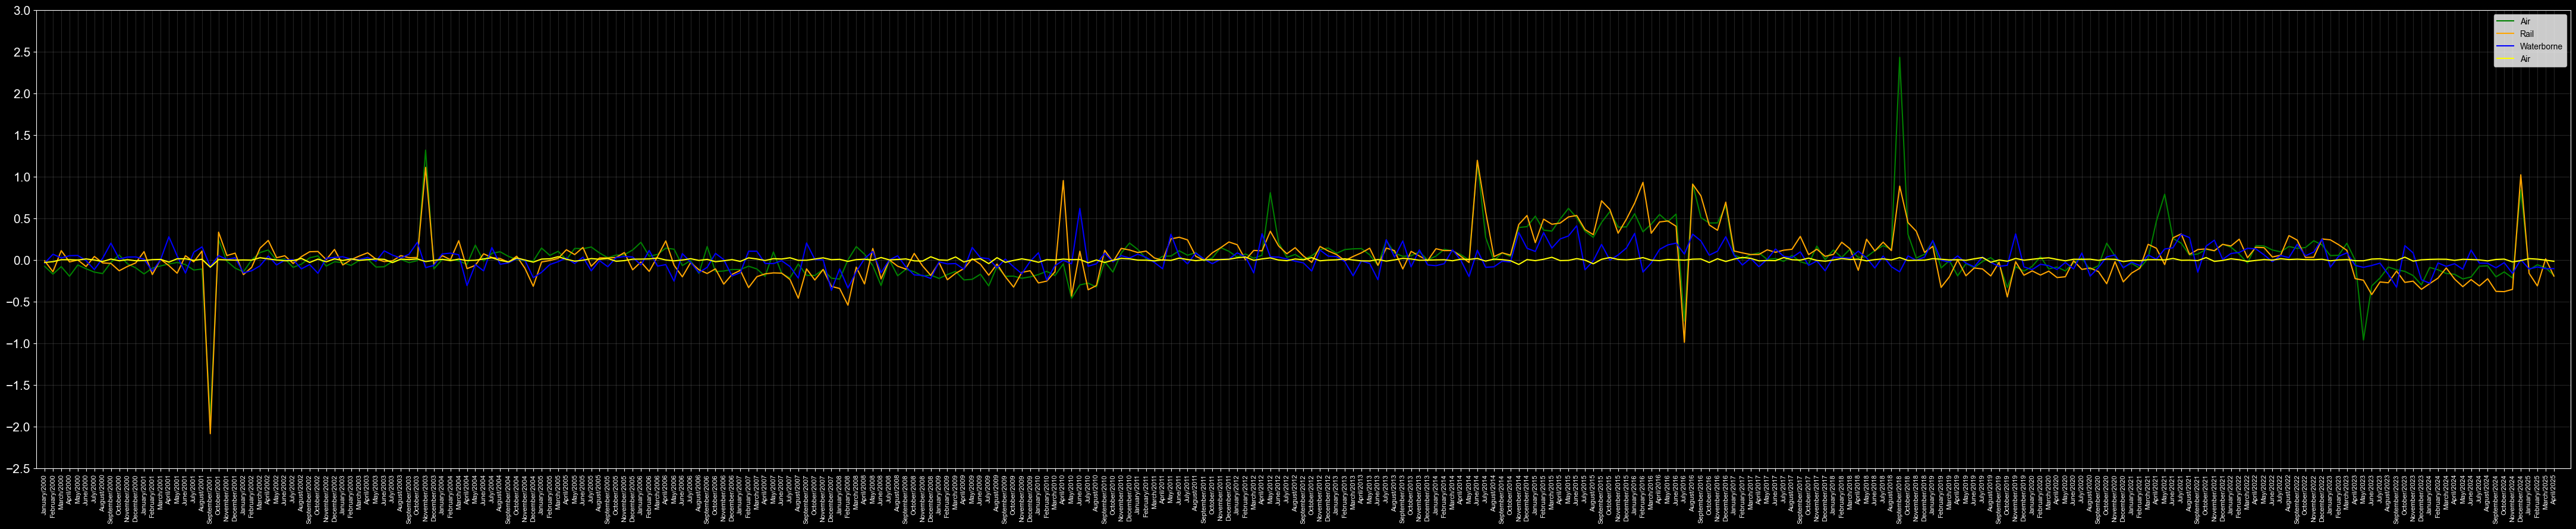

In [9]:
fig, ax = plt.subplots(figsize=(55, 10))
plt.rcParams['font.family'] = 'Arial'

fig.set_facecolor('black')
ax.set_facecolor('black')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

ax.tick_params(axis='both', colors='white')

df['Month/Year'] = pd.to_datetime(df['OBS_DATE'], format='mixed', errors='coerce').dt.strftime('%B/%Y')

y_air = df.groupby('Month/Year')['AIR_GROWTH'].sum()
y_rail = df.groupby('Month/Year')['RAIL_GROWTH'].sum()
y_water_born = df.groupby('Month/Year')['WATERBORNE_GROWTH'].sum()
y_truck = df.groupby('Month/Year')['TRUCK_GROWTH'].sum()

colors = [ 'Green' , 'Blue' , 'Yellow' , 'Orange']

ax.plot(df['Month/Year'] , y_air, color='green', label='Air')
ax.plot(df['Month/Year'] , y_rail, color='orange', label='Rail')
ax.plot(df['Month/Year'] , y_water_born, color='blue', label='Waterborne')
ax.plot(df['Month/Year'] , y_truck, color='yellow', label='Air')

ax.set_xlim(-1, df['Month/Year'].shape[0] + 1)
ax.set_ylim(y_air.min()-0.5, y_air.max()+0.5)

plt.xticks(df['Month/Year'], rotation = 90, fontsize = 8, fontname = 'Arial')
plt.yticks([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3], fontsize = 15, fontname = 'Arial')

plt.grid(True,alpha=0.2)
plt.legend(loc='upper right', fontsize=15, prop={'family': 'Arial'})
plt.show()


#

## 8. What is the seasonal trend in freight carloads — and how should a logistics company adjust capacity accordingly?

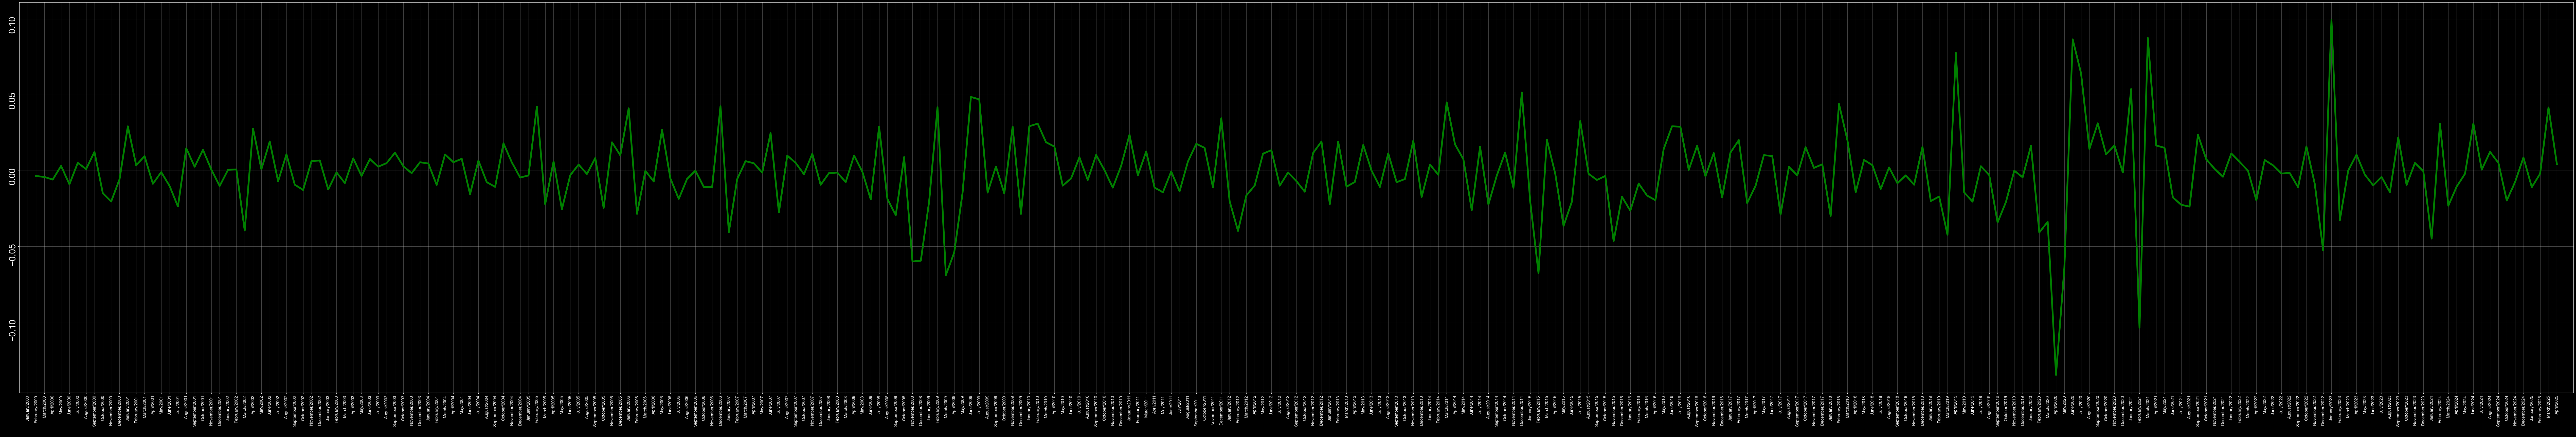

In [10]:
pct_chagne = df['RAIL_FRT_CARLOADS_D11'].pct_change(fill_method=None)

plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(figsize=(130, 20))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_color('white')

ax.tick_params(axis='both', colors='white', rotation=90)

ax.plot(
    df['Month/Year'],
    pct_chagne, 
    color='green',
    linewidth = 5
)


plt.yticks(fontsize = 25, fontname='Arial')
plt.xticks(df['Month/Year'], fontsize = 12, fontname='Arial')

plt.xlim(-1, df['Month/Year'].shape[0] + 1)

plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('% Change', fontsize=14)

plt.grid(True, alpha=0.4)
plt.show()

### 📈 Rail Freight % Change — Insights for Logistics Strategy

- ✅ **Plan for volatility**: Avoid fixed yearly schedules.
- ✅ **Flexible contracts**: Use short-term leasing or 3PL.
- ✅ **Prepare for spikes**: Keep emergency buffer for high growth months.
- ✅ **Optimize during drops**: Cut costs in -15% months.
- ✅ **Align warehouse intake**: Avoid congestion in peak freight periods.
---

# 

## 9. Which months show spikes in intermodal rail shipments — and what could be the reason?

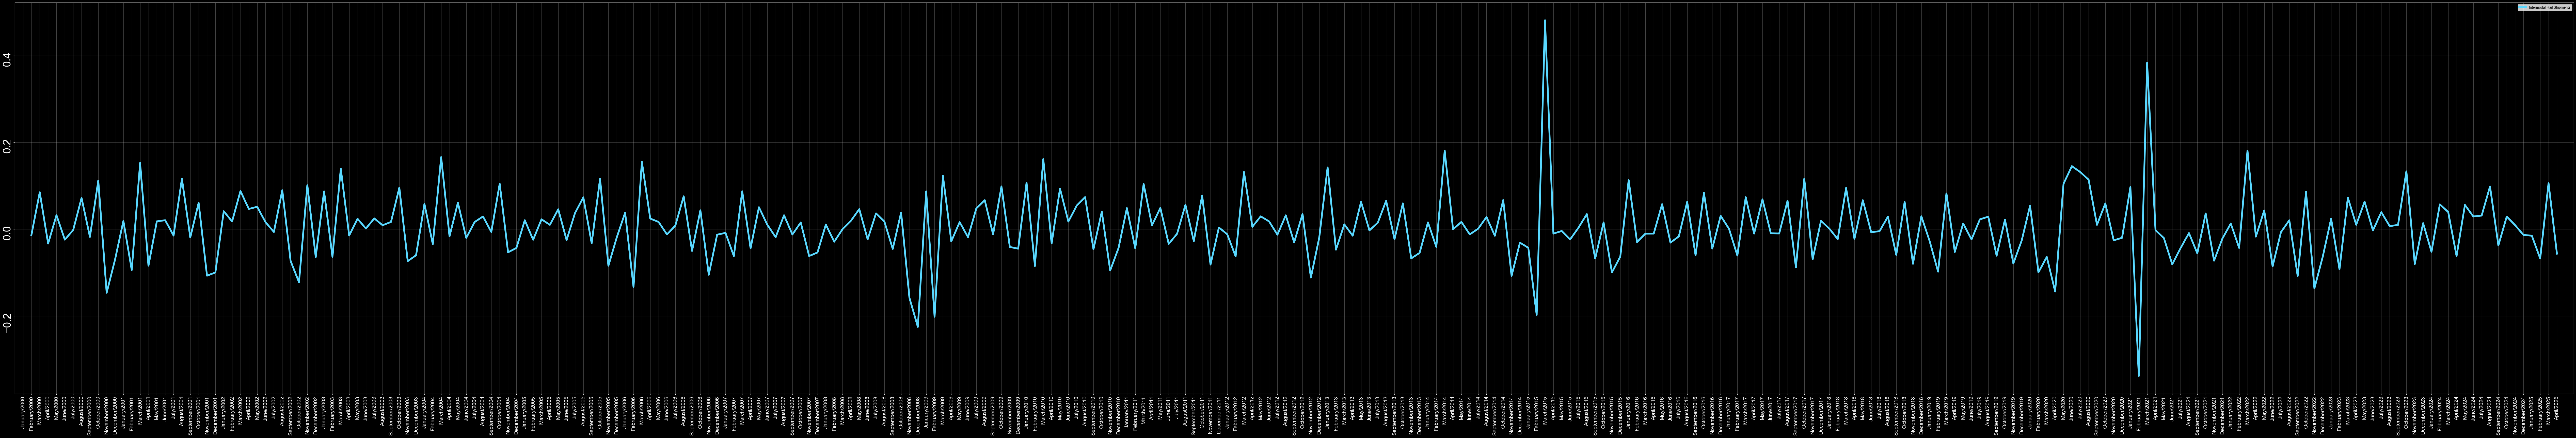

In [11]:
total_pct_change_intermodal = (df['RAIL_FRT_INTERMODAL'].pct_change(fill_method=None) + df['RAIL_FRT_INTERMODAL_D11'].pct_change(fill_method=None))

fig, ax = plt.subplots(figsize=(130, 20))
plt.rcParams['font.family'] = 'Arial'

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_color('white')
   
ax.tick_params(axis='both', colors='white', rotation=90)

ax.plot(
    df['Month/Year'],
    total_pct_change_intermodal, 
    color="#59D8FF",
    linewidth = 5,
    label = 'Intermodal Rail Shipments'
) 
plt.yticks(fontsize = 30, fontname='Arial')
plt.xticks(df['Month/Year'], fontsize = 15, fontname='Arial')
plt.xlim(-1, df['Month/Year'].shape[0] + 1)

plt.legend(fontsize=18, prop={'family': 'Arial'})
plt.grid(True, alpha=0.4)
plt.show()

### 📈 Intermodal Rail Shipment Spikes — Analysis & Strategic Insights

**Q: Which months show spikes in intermodal rail shipments — and what could be the reason?**

#### 🔍 Observations:
- Significant spike observed around **mid-2020**, following a steep decline — likely due to:
  - 📉 **COVID-19 lockdowns** causing a sudden drop
  - 🔁 Followed by a **rebound** as supply chains adjusted
- Smaller spikes occur during:
  - **Peak retail seasons** (e.g., late Q3 & Q4)
  - **Post-pandemic recovery phase** (e.g., 2021-22)

#### 🧠 Possible Reasons:
- **Demand Surges** from e-commerce and essential goods post-pandemic
- **Supply Chain Disruptions** causing irregular loading volumes
- **Seasonality** during back-to-school, holiday, or end-of-quarter shipping pushes

#### ✅ Strategic Recommendations:
- 📦 **Forecast Capacity by Quarter**, not annually, to handle volatility
- 🚚 **Coordinate Intermodal Resources** with warehousing and port availability
- 📉 **Track Early Warning Indicators** (fuel price hikes, port congestion) to predict future spikes

---


#

## 10. What is the distribution of monthly rail freight carloads, and are there any patterns or anomalies in volume over time?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7932\2856589848.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18, prop={'family': 'Arial'})


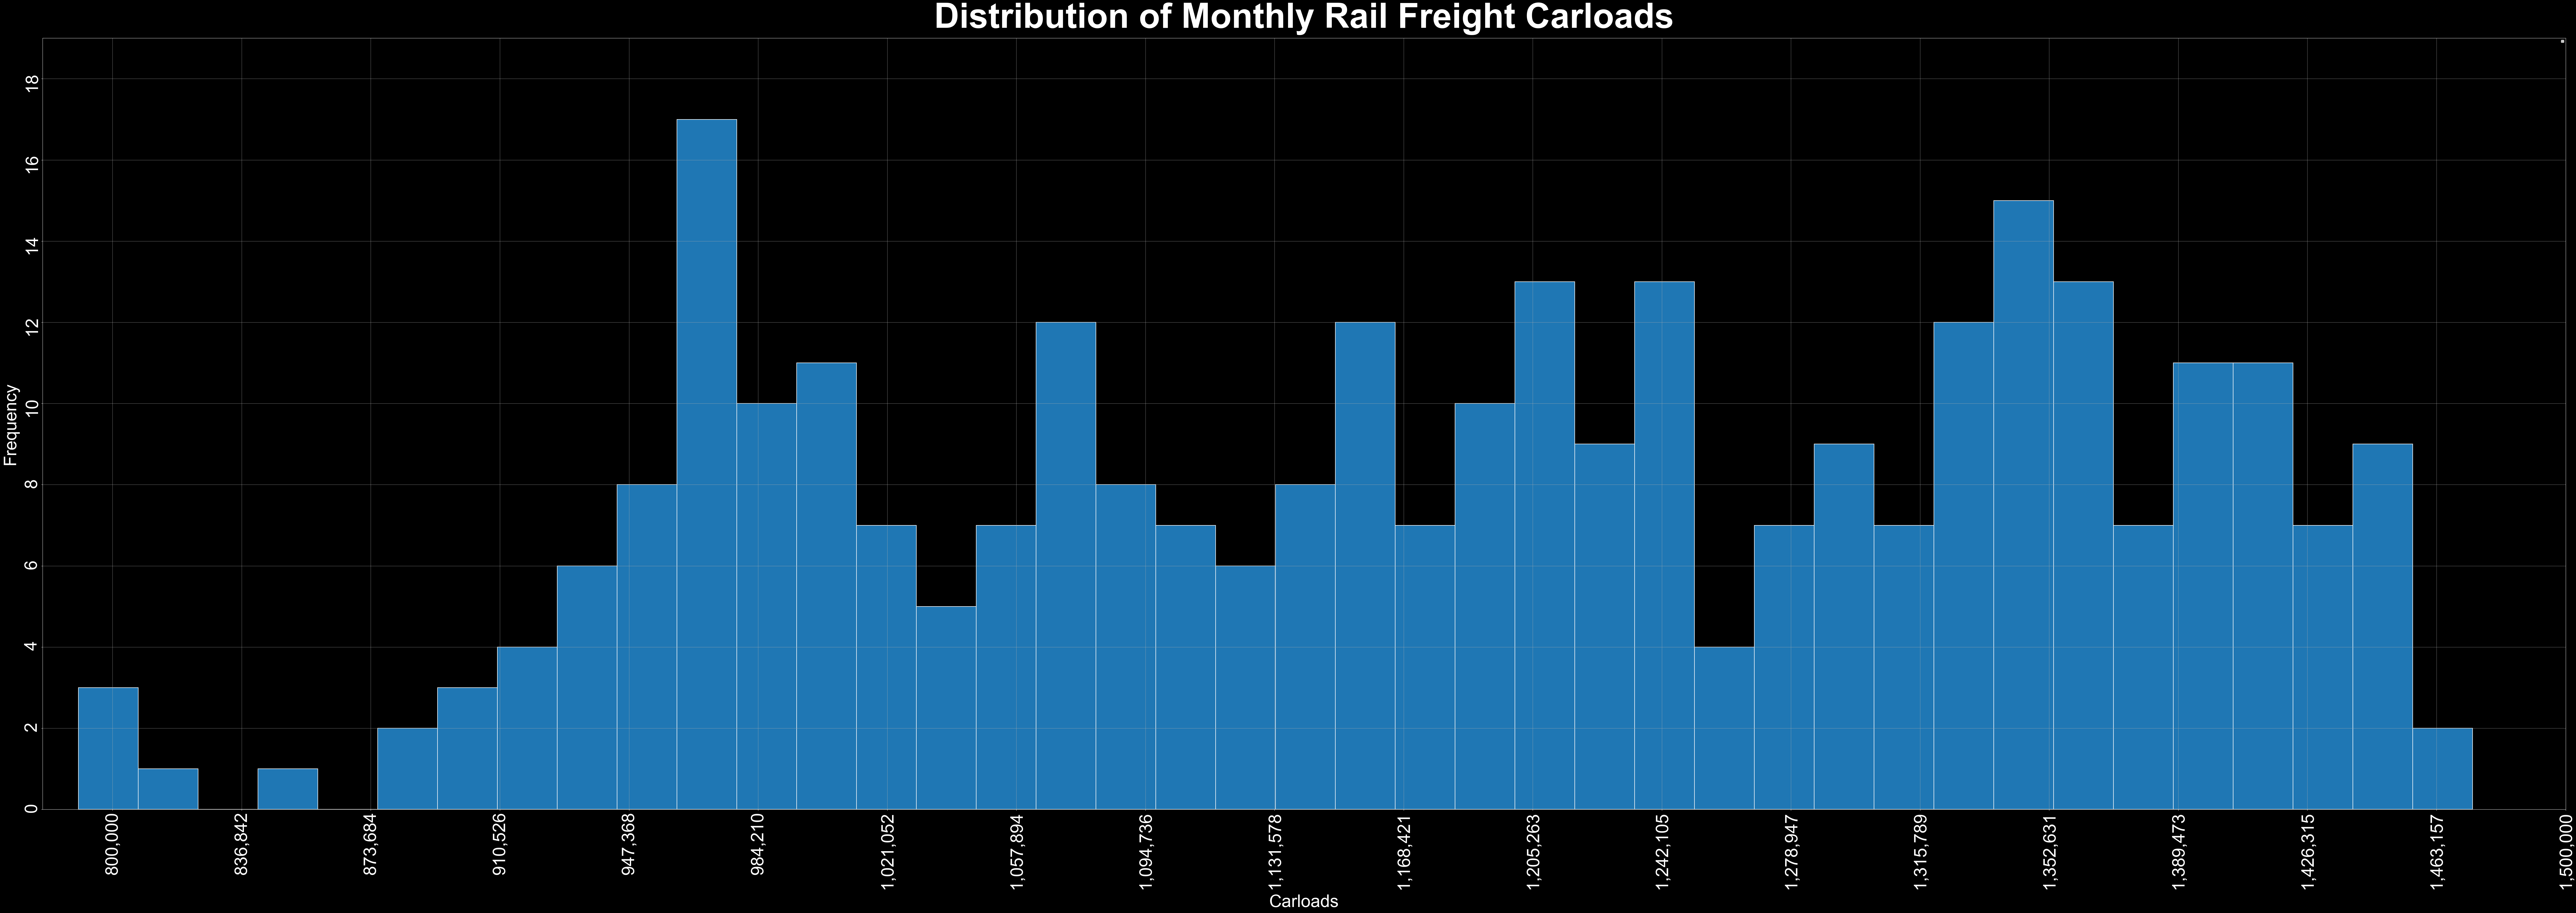

In [12]:
carloads_data = df['RAIL_FRT_CARLOADS']
plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(130, 40))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_color('white')

ax.tick_params(axis='both', colors='white', rotation=90)

ax.hist(
    carloads_data,
    bins=40,
    edgecolor='white',
    linewidth=1.5
)

plt.xlim(780000, 1500000)
plt.ylim(0, 19)


# Convert x-axis to actual carload numbers
plt.xticks(
    ticks=np.linspace(800000, 1500000, 20), 
    labels=[f"{int(x):,}" for x in np.linspace(800000, 1500000, 20)], 
    fontsize=50
)
plt.yticks(np.arange(0,20,2), fontsize = 50, fontname='Arial')

plt.title('Distribution of Monthly Rail Freight Carloads', fontsize=100, color='white', fontweight='bold', pad=30)
plt.xlabel('Carloads', fontsize=50, color='white', labelpad=15)
plt.ylabel('Frequency', fontsize=50, color='white', labelpad=15)

plt.legend(fontsize=18, prop={'family': 'Arial'})
plt.grid(True, alpha=0.7)
plt.show()

🧠 **Insights:**

✅ **1. Carload Volume is Mostly Concentrated Between 900,000 and 1,400,000:**  
The distribution appears roughly normal but slightly **right-skewed**, indicating that **higher volumes are slightly more frequent.**

✅ **2. Peaks in the Range 1,000,000 – 1,400,000:**  
Majority of the months fall within this mid-to-high range, which likely reflects stable shipping volumes in most seasons.

⚠️ **3. Outliers and Low Volume Months Exist:**  
A small number of months recorded **significantly lower values** (below 900,000), which might reflect **economic downturns, strikes, or natural disasters.**

📊 **4. Anomalies Can Be Investigated:**  
You can further investigat

--- 

#

## 📌 11. Has there been a correlation between AIR_RPM_TSI and AIR_RTMFM (Revenue Ton Miles)? What does it suggest about air cargo utilization?

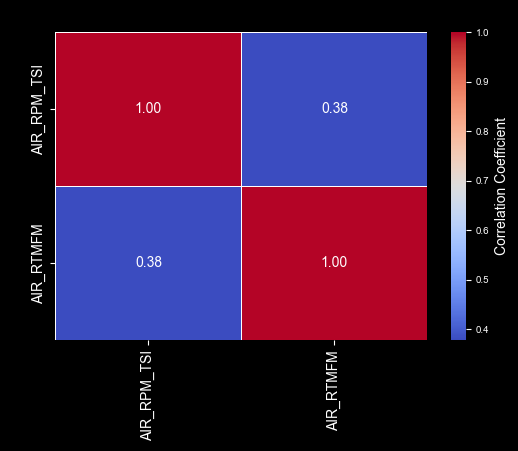

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_color('white')

ax.tick_params(axis='both', colors='white', rotation=90)

# Select relevant columns
corr_df = df[['AIR_RPM_TSI', 'AIR_RTMFM']].dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}  # 👈 This adds the label
)

colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.label.set_color('white')  # ✅ this makes the label white
colorbar.ax.tick_params(colors='white', labelsize = 7)

plt.title('Correlation between AIR_RPM_TSI and AIR_RTMFM', fontsize=14)
plt.show()


🧪 **Observation from Heatmap:**

- The **correlation coefficient is +0.38**, indicating a **moderate positive linear relationship** between `AIR_RPM_TSI` (Revenue Passenger Miles) and `AIR_RTMFM` (Revenue Ton Miles for Freight).
- This suggests that when air passenger traffic increases, air freight traffic **tends to increase as well**, though **not s**
--- 


#

## 📌 12. How does the LOAD_FACTOR vary across months or years — and what does that indicate about operational efficiency?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7932\4268344537.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18, prop={'family': 'Arial'})


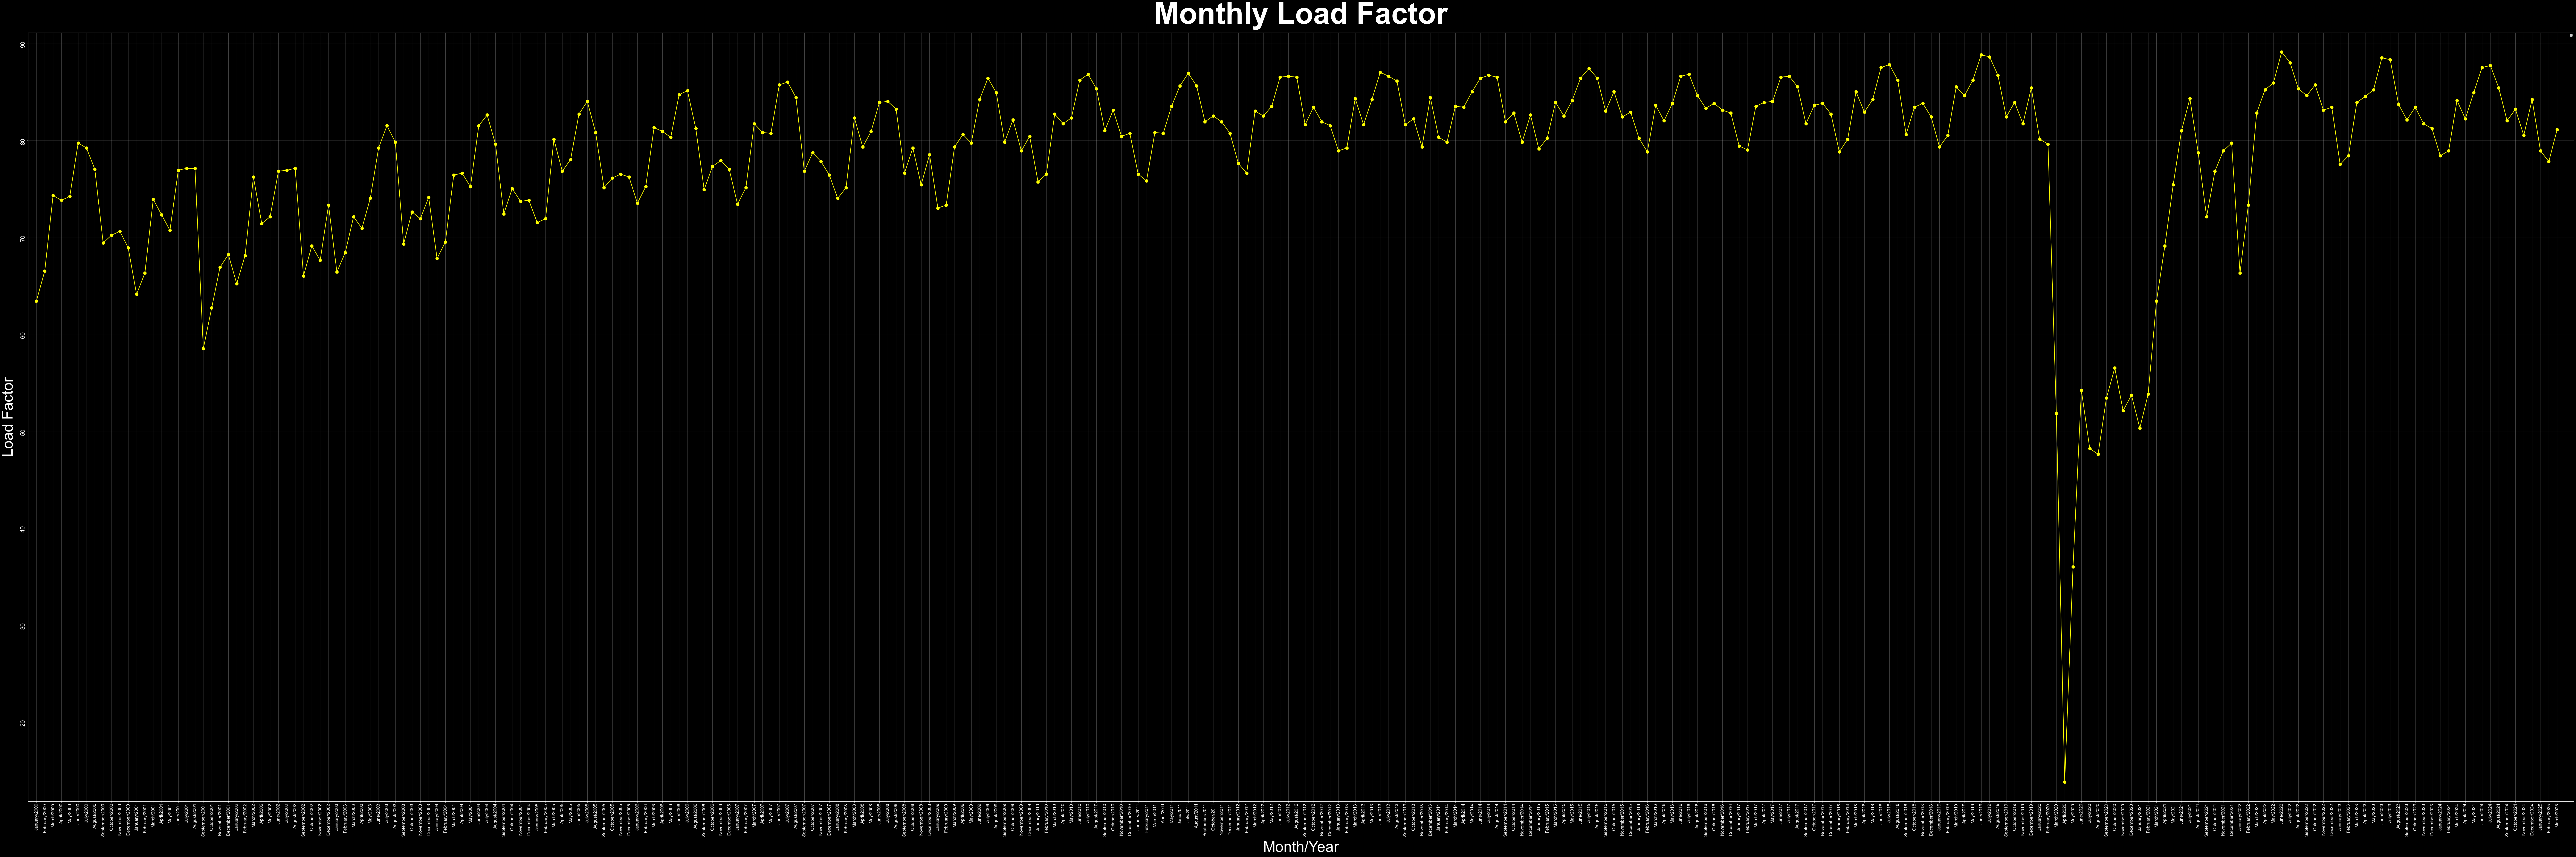

In [61]:
clean_df = df.drop(df[df['LOAD_FACTOR'] == 0].index)      # Dops rows with LOAD_FACTOR = 0 (Data not available)
plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(120,40))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spines in ax.spines.values():
    spines.set_color('white')

ax.tick_params(axis='both', colors='white', rotation=90)

ax.plot(
    clean_df['Month/Year'], 
    clean_df['LOAD_FACTOR'], 
    marker="o", 
    markersize=10, 
    color='yellow', 
    linewidth=2
)

plt.xlim(-1, clean_df['Month/Year'].shape[0] + 1)
plt.ylim(np.min(clean_df['LOAD_FACTOR'])- 2, np.max(clean_df['LOAD_FACTOR'])+2)

plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=20, fontname='Arial')

plt.title('Monthly Load Factor', fontsize=100, color='white', fontweight='bold', pad=30)
plt.xlabel('Month/Year', fontsize=50, color='white', labelpad=15)
plt.ylabel('Load Factor', fontsize=50, color='white', labelpad=15)

plt.legend(fontsize=18, prop={'family': 'Arial'})
plt.tight_layout()
plt.grid(True, alpha=0.4)
plt.show()

### ✅ Observation on Monthly Load Factor Variation

The line graph shows how **Load Factor** has varied across months over several years. Here are key insights:

- 🔼 **Gradual Improvement**: The Load Factor shows a steady increase over the years, suggesting improved operational efficiency in utilizing available air cargo capacity.
  
- 📉 **Sharp Decline During Pandemic**: A noticeable dip appears around early 2020, which aligns with the **COVID-19 pandemic**. This indicates underutilization during that period, possibly due to reduced demand and grounded fleets.

- 🔁 **Recovery Phase**: Post-2020, the Load Factor rises sharply, indicating a **rebound in operations** and better optimization of cargo space.

- 📊 **Consistent Seasonality**: Minor fluctuations suggest recurring seasonal variations in air cargo utilization — likely influenced by demand cycles, such as peak shipping seasons.

---

### 📌 Interpretation:
A **higher and more stable load factor** reflects efficient use of air cargo space, leading to lower costs per ton-mile. Conversely, **volatile or low values** point to underutilization, requiring operational adjustments like fleet downsizing or dynamic routing.



#

##

# ✈️ Aviation & Air Cargo

11. How has ENPLANE_I (likely enplaned passengers or cargo) changed over time? What does this imply for fleet management?

12. During which months is air transport least utilized? Should companies reduce fleet size or reschedule maintenance in those periods?

13. Is there a relationship between AIR_RPM_TSI and ENPLANE_I? What does it tell us about flight efficiency or capacity planning?

#

## 🚆 Rail Operations

14. What are the peak and low seasons for RAIL_FRT_CARLOADS and INTERMODAL shipments? How can businesses plan warehouse or staff needs accordingly?

15. What was the impact of any specific year (e.g., COVID-19 in 2020) on RAIL_PM (rail passenger miles)?

16. Is there a trend of decreasing rail freight volume over time? Should a company diversify into road or intermodal logistics?'

#

## 📈 Trends and Forecasting

17. Can you identify a trend or pattern in the Transportation Services Index (TSI)? Is it growing, declining, or seasonal?

18. Is there a shift in preference from one transport mode to another over the years (e.g., air to rail)?

19. Can we forecast RAIL_FRT_INTERMODAL using a moving average or rolling mean? What can this forecast tell logistics firms?

#

## 🧮 Efficiency and Utilization

20. Which year had the highest average LOAD_FACTOR? How does that reflect company-wide utilization or profitability?

21. Are there inefficiencies where high ENPLANE_I values don't correlate with high AIR_RPM_TSI?

#

## 🔄 Seasonality & Business Decisions

22. Which months typically experience high freight traffic? Should companies offer discounts or allocate extra fleet in those times?

23. Is there a recurring seasonal dip across most indices (RAIL, AIR, INTERMODAL)? How should planning adapt to that?

#

## 📉 Crisis or Market Shock Analysis

24. Which transportation metrics dropped the most during 2020 (pandemic)? What was the recovery trend?

25. How resilient is each mode of transport during economic shocks? (Compare 2008, 2020, etc.)